In [66]:
# Francisco Lobeira
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [58]:
# Mouse data table print
mouse_metadata.head()
#len(mouse_metadata)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [59]:
# Study results table print
study_results.head()
#len(study_results)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [60]:
# Understand the data
u = study_results["Mouse ID"].unique()
len(u)


249

In [61]:
# There are 249 unique values in the Mouse ID column in both data sets
# Merge the two data sets
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
combined_df.head(300)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
295,b742,Capomulin,Male,7,21,25,38.617684,0
296,b742,Capomulin,Male,7,21,30,39.167949,0
297,b742,Capomulin,Male,7,21,35,39.847576,0
298,b742,Capomulin,Male,7,21,40,38.255627,0


In [ ]:
# make sure all the rows are in th enew combined df
len(combined_df)

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
u_regimen = combined_df["Drug Regimen"].unique()
u_regimen

In [ ]:
## testing ##
regimen_gb = combined_df.groupby(['Drug Regimen'])
regimen_gb.head(5)

In [ ]:
# Extra... 
# generate a summary stat table for the entire population use tumor volume

v_mean = combined_df['Tumor Volume (mm3)'].mean()
v_median = combined_df['Tumor Volume (mm3)'].median()
v_mode = combined_df['Tumor Volume (mm3)'].mode()
v_sem = combined_df['Tumor Volume (mm3)'].sem()
v_std = combined_df['Tumor Volume (mm3)'].std()

In [ ]:
#Summary Statistics fro each regimen
# I will create different data frames and then combine them to get the desired solution
mean_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean().reset_index()
median_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median().reset_index()
sem_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem().reset_index()
std_df = combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std().reset_index()

In [ ]:
# Merge all the data frames to have a single table with all the info
mergeOne = pd.merge(mean_df, median_df, on = "Drug Regimen", how = "outer")
mergeTwo = pd.merge(mergeOne, sem_df, on = "Drug Regimen", how = "outer")
summaryStats = pd.merge(mergeTwo, std_df, on = "Drug Regimen", how = "outer")
summaryStats

In [ ]:
# Rename teh columns so thet it makes sense
summaryStats.columns= ['Drug Regimen', 'Average', 'Median', 'SME', "STD"]
summaryStats

In [ ]:
# Using DataFrame.plot
regimen_count_df = combined_df.groupby(['Drug Regimen'])['Age_months'].count()
regimen_count_df.plot.bar()
plt.title("Number of mice in each Regimen")
plt.ylabel("Count")

In [ ]:
# Using Matplotlib's pyplot
regimen_count_df = combined_df.groupby(['Drug Regimen'])['Age_months'].count()
x_axis = np.arange(len(regimen_count_df))


In [ ]:
plt.bar(x_axis, regimen_count_df, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva",
                            "Ramicane", "Stelasyn", "Zoniferol"], rotation = 90)
plt.title("Number of mice in each Regimen")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")

In [ ]:
# Using DataFrame.plot
sex = combined_df.groupby(['Sex'])['Age_months'].count()
sex.plot.pie()
plt.title("Male vs Female")

In [ ]:
labels = ["Male","Female"]
sizes = sex
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
#Create 4 data frames for the 4 regimens we wan to analize (Capomulin, Ramicane, Infubinol, and Ceftamin.)
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
ramicane_df = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane"]
infubinol_df = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol"]
caftamin_df = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin"]
capomulin_df

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens
cap_finalV = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
ram_finalV = ramicane_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
inf_finalV = infubinol_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
caft_finalV = caftamin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)','Timepoint'].max()
cap_finalV

In [ ]:
# Calculate the final tumor volume of each mouse across Ramicane
ram_finalV

In [ ]:
# Calculate the final tumor volume of each mouse across Infubinol
inf_finalV

In [ ]:
# Calculate the final tumor volume of each mouse across Caftamin
caft_finalV

In [ ]:
# Determine if there are any potential outliers in capomulin
quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < lower_bound) | (capomulin_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

In [ ]:
# Determine if there are any potential outliers in capomulin
quartiles2 = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq2 = quartiles[0.25]
upperq2 = quartiles[0.75]
iqr2 = upperq2-lowerq2

print(f"The lower quartile of occupancy is: {lowerq2}")
print(f"The upper quartile of occupancy is: {upperq2}")
print(f"The interquartile range of occupancy is: {iqr2}")
print(f"The the median of occupancy is: {quartiles2[0.5]} ")

lower_bound2 = lowerq2 - (1.5*iqr)
upper_bound2 = upperq2 + (1.5*iqr)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

outlier_occupancy2 = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < lower_bound2) | (ramicane_df['Tumor Volume (mm3)'] > upper_bound2)]
outlier_occupancy2

In [ ]:
# Determine if there are any potential outliers in infubinol
quartiles3 = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq3 = quartiles[0.25]
upperq3 = quartiles[0.75]
iqr3 = upperq3-lowerq3

print(f"The lower quartile of occupancy is: {lowerq3}")
print(f"The upper quartile of occupancy is: {upperq3}")
print(f"The interquartile range of occupancy is: {iqr3}")
print(f"The the median of occupancy is: {quartiles3[0.5]} ")

lower_bound3 = lowerq3 - (1.5*iqr)
upper_bound3 = upperq3 + (1.5*iqr)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")

outlier_occupancy3 = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < lower_bound3) | (infubinol_df['Tumor Volume (mm3)'] > upper_bound3)]
outlier_occupancy3

In [ ]:
# Determine if there are any potential outliers in caftamin
quartiles = caftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = caftamin_df.loc[(caftamin_df['Tumor Volume (mm3)'] < lower_bound) | (caftamin_df['Tumor Volume (mm3)'] > upper_bound)]
outlier_occupancy

In [ ]:
# Create a box plot
capBox = capomulin_df['Tumor Volume (mm3)']
ramBox = ramicane_df['Tumor Volume (mm3)']
infBox = infubinol_df['Tumor Volume (mm3)']
cafBox = caftamin_df['Tumor Volume (mm3)']

green_diamond = dict(markerfacecolor='g', marker='D')


fig1, ax1 = plt.subplots()
ax1.set_title('Tummor Volume')
ax1.set_ylabel('mm3')
ax1.boxplot(capBox,flierprops=green_diamond)

fig2, ax2 = plt.subplots()
ax1.set_title('Tummor Volume')
ax1.set_ylabel('mm3')
ax2.boxplot(ramBox,flierprops=green_diamond)

fig3, ax3 = plt.subplots()
ax3.set_title('Tummor Volume')
ax3.set_ylabel('mm3')
ax3.boxplot(infBox,flierprops=green_diamond)

fig4, ax4 = plt.subplots()
ax4.set_title('Tummor Volume')
ax4.set_ylabel('mm3')
ax4.boxplot(cafBox,flierprops=green_diamond)

plt.show()

In [ ]:
#Wisker Plot
capMean = capomulin_df['Tumor Volume (mm3)'].mean()
capSE = [sem(capomulin_df['Tumor Volume (mm3)'])
capX = np.arange(0, 230 , 1) + 1


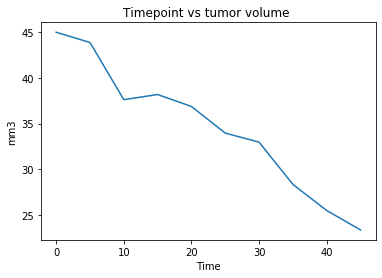

In [55]:
#Line plot 
single = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]


plt.plot(single["Timepoint"],single["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("mm3")
plt.title("Timepoint vs tumor volume ")
plt.show()

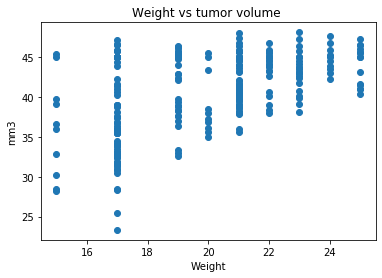

In [64]:
# Scatter Plot 

plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
plt.xlabel("Weight")
plt.ylabel("mm3")
plt.title("Weight vs tumor volume ")
plt.show()

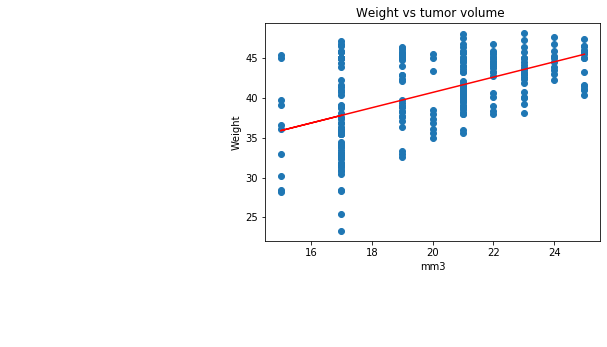

In [68]:
# Liniear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
regress_values = capomulin_df["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_df["Weight (g)"],capomulin_df["Tumor Volume (mm3)"])
plt.plot(capomulin_df["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Weight vs tumor volume ")
plt.xlabel('mm3')
plt.ylabel('Weight')
plt.show()

In [ ]:
# Correlation
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between both factors is {round(correlation[0],2)}")